### KNN implementation

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

class OurKNearestNeighbors():
    def __init__(self, n_neighbors=2):

        self.X_train = 0.0
        self.y_train = 0.0

        self.n_neighbors = n_neighbors

    def get_params(self, deep=True):
        return {'n_neighbors': self.n_neighbors}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def minkowski_distance(self, a, b, p=10):
        return np.power(np.sum(np.power(np.abs(a - b), p), axis=1), 1/p)

    def kneighbors(self, X_test):

        dist = []
        neigh_ind = []
        point_dist = []

        for x_test in X_test:
            point_dist += [ self.minkowski_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        return np.array(neigh_ind)

    def predict(self, X_test):

        neighbors = self.kneighbors(X_test)
        y_pred = np.array([
            np.argmax(np.bincount(self.y_train[neighbor]))
            for neighbor in neighbors
        ])
        return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test

    # model metrics

    def accurancy(self, y_pred,y_test):
        return accuracy_score(y_test, y_pred)
    
    def precision(self, y_pred,y_test):
        return precision_score(y_test, y_pred)
    
    def recall(self, y_pred,y_test):
        return recall_score(y_test, y_pred)
        
    def auc(self, y_pred,y_test):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        return fpr, tpr, roc_auc
    
    def plot_roc(self, fpr, tpr, title):
        plt.plot(fpr, tpr, color='darkorange', lw=2)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('1-Especificity')
        plt.ylabel('Sensibility')
        plt.title(title)
        plt.show()

### Red Wine Dataset

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read the data set
df_wine = pd.read_csv('datasets/winequality-red.csv')

# make sure that there are no null values that can affect the models
mask = df_wine.isnull()
#print(mask.sum())

# visualizing the values of each feature and the comparison to the output
#for col in df_wine.columns[:-1]:
    #df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
#plt.show()

"""
Data preprocessing - outlier treatment
eliminating items from outside from of the 
1.5 * Inter Quartile Range (0.125% to 0.875% of the data)
"""
l_limit_perc = 0.01
h_limit_perc = 0.99

# fixed acidity
low_limit = df_wine['fixed acidity'].quantile(l_limit_perc)
high_limit = df_wine['fixed acidity'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['fixed acidity'] >= low_limit) & (df_wine['fixed acidity'] <= high_limit)]

# volatile acidity
low_limit = df_wine['volatile acidity'].quantile(l_limit_perc)
high_limit = df_wine['volatile acidity'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['volatile acidity'] >= low_limit) & (df_wine['volatile acidity'] <= high_limit)]

# citric acid
low_limit = df_wine['citric acid'].quantile(l_limit_perc)
high_limit = df_wine['citric acid'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['citric acid'] >= low_limit) & (df_wine['citric acid'] <= high_limit)]

# residual sugar
low_limit = df_wine['residual sugar'].quantile(l_limit_perc)
high_limit = df_wine['residual sugar'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['residual sugar'] >= low_limit) & (df_wine['residual sugar'] <= high_limit)]

# chlorides
low_limit = df_wine['chlorides'].quantile(l_limit_perc)
high_limit = df_wine['chlorides'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['chlorides'] >= low_limit) & (df_wine['chlorides'] <= high_limit)]

# free sulfur dioxide
low_limit = df_wine['free sulfur dioxide'].quantile(l_limit_perc)
high_limit = df_wine['free sulfur dioxide'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['free sulfur dioxide'] >= low_limit) & (df_wine['free sulfur dioxide'] <= high_limit)]

# total sulfur dioxide
low_limit = df_wine['total sulfur dioxide'].quantile(l_limit_perc)
high_limit = df_wine['total sulfur dioxide'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['total sulfur dioxide'] >= low_limit) & (df_wine['total sulfur dioxide'] <= high_limit)]

# density
low_limit = df_wine['density'].quantile(l_limit_perc)
high_limit = df_wine['density'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['density'] >= low_limit) & (df_wine['density'] <= high_limit)]

# pH
low_limit = df_wine['pH'].quantile(l_limit_perc)
high_limit = df_wine['pH'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['pH'] >= low_limit) & (df_wine['pH'] <= high_limit)]

# sulphates
low_limit = df_wine['sulphates'].quantile(l_limit_perc)
high_limit = df_wine['sulphates'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['sulphates'] >= low_limit) & (df_wine['sulphates'] <= high_limit)]

# alcohol
low_limit = df_wine['alcohol'].quantile(l_limit_perc)
high_limit = df_wine['alcohol'].quantile(h_limit_perc)
df_wine = df_wine.loc[(df_wine['alcohol'] >= low_limit) & (df_wine['alcohol'] <= high_limit)]

# visualizing the values of each feature and the comparison to the output
#for col in df_wine.columns[:-1]:
    #df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
#plt.show()

# Feature engineering 
df_wine['alcohol'] = (df_wine['alcohol']-df_wine['alcohol'].mean())/df_wine['alcohol'].std()
df_wine['chlorides'] = (df_wine['chlorides']-df_wine['chlorides'].mean())/df_wine['chlorides'].std()
df_wine['citric acid'] = (df_wine['citric acid']-df_wine['citric acid'].mean())/df_wine['citric acid'].std()
df_wine['density'] = (df_wine['density']-df_wine['density'].mean())/df_wine['density'].std()
df_wine['fixed acidity'] = (df_wine['fixed acidity']-df_wine['fixed acidity'].mean())/df_wine['fixed acidity'].std()
df_wine['free sulfur dioxide'] = (df_wine['free sulfur dioxide']-df_wine['free sulfur dioxide'].mean())/df_wine['free sulfur dioxide'].std()
df_wine['pH'] = (df_wine['pH']-df_wine['pH'].mean())/df_wine['pH'].std()
df_wine['residual sugar'] = (df_wine['residual sugar']-df_wine['residual sugar'].mean())/df_wine['residual sugar'].std()
df_wine['sulphates'] = (df_wine['sulphates']-df_wine['sulphates'].mean())/df_wine['sulphates'].std()
df_wine['total sulfur dioxide'] = (df_wine['total sulfur dioxide']-df_wine['total sulfur dioxide'].mean())/df_wine['total sulfur dioxide'].std()
df_wine['volatile acidity'] = (df_wine['volatile acidity']-df_wine['volatile acidity'].mean())/df_wine['volatile acidity'].std()

# change the value of the output to only two values
# 0 -> bad wine, wines with 3, 4 and 5 in quality
# 1 -> good wine, wines with 6, 7 and 8 in queality
df_wine.loc[df_wine['quality'] <= 5, 'quality'] = 0
df_wine.loc[df_wine['quality'] > 5, 'quality'] = 1

df_wine.head(10)

# Define the training and test set

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X0 = df_wine.loc[df_wine['quality'] == 0, features]
Y0 = df_wine.loc[df_wine['quality'] == 0, 'quality']

X1 = df_wine.loc[df_wine['quality'] == 1, features]
Y1 = df_wine.loc[df_wine['quality'] == 1, 'quality']

test_percentage = 0.2

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, Y0, test_size=test_percentage, random_state=45)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=test_percentage, random_state=45)

X_train = pd.concat([X0_train, X1_train], axis= 0)
X_test = pd.concat([X0_test, X1_test], axis= 0)
y_train = pd.concat([y0_train, y1_train], axis= 0)
y_test = pd.concat([y0_test, y1_test], axis= 0)

### Train model and test results

In [251]:
from sklearn.neighbors import KNeighborsClassifier

if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

k = 11
#KNN_classifier = KNearestNeighbors(X_train, y_train, k)

model = OurKNearestNeighbors(k)
model.fit(X_train, y_train)

KNN_accuracy, y_pred, y_test = model.score(X_test, y_test)
#KNN_accuracy, y_pred, y_test = model.score(X_test, y_test)

print("Accuracy: ", model.accurancy(y_pred, y_test))
print("Precision: ", model.precision(y_pred, y_test))
print("Recall: ", model.recall(y_pred, y_test))

# Instantiate model with the best hyperparameters
model_sklearn = KNeighborsClassifier(n_neighbors=k)
model_sklearn.fit(X_train, y_train)

## Predictions for sklearn model
y_pred2 = model_sklearn.predict(X_test)

print("Sklearn model: ")
print("Accuracy: ", model.accurancy(y_pred2, y_test))
print("Precision: ", model.precision(y_pred2, y_test))
print("Recall: ", model.recall(y_pred2, y_test))

Accuracy:  0.7153558052434457
Precision:  0.7096774193548387
Recall:  0.7801418439716312
Sklearn model: 
Accuracy:  0.6891385767790262
Precision:  0.6835443037974683
Recall:  0.7659574468085106


    Amount of tests          Model  Accurancy  Precision    Recall       Auc
0                12      Our model   0.791667   0.769231  0.833333  0.791667
1                12  Sklearn model   0.708333   0.692308  0.750000  0.708333
2                31      Our model   0.741935   0.714286  0.806452  0.741935
3                31  Sklearn model   0.661290   0.656250  0.677419  0.661290
4                63      Our model   0.714286   0.684932  0.793651  0.714286
5                63  Sklearn model   0.658730   0.631579  0.761905  0.658730
6                94      Our model   0.702128   0.675926  0.776596  0.702128
7                94  Sklearn model   0.675532   0.651376  0.755319  0.675532
8               113      Our model   0.703540   0.676923  0.778761  0.703540
9               113  Sklearn model   0.685841   0.659091  0.769912  0.685841
10              126      Our model   0.714286   0.687500  0.785714  0.714286
11              126  Sklearn model   0.690476   0.662162  0.777778  0.690476

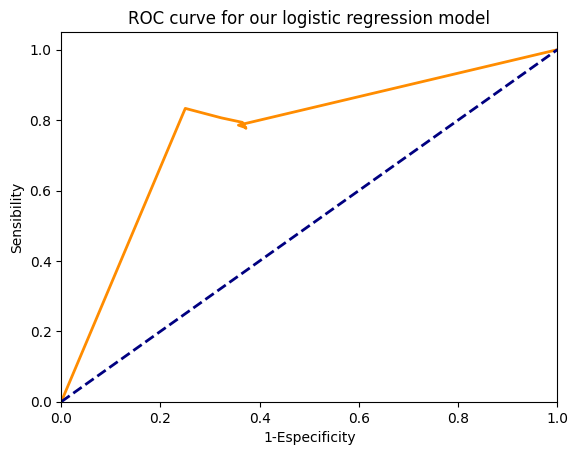

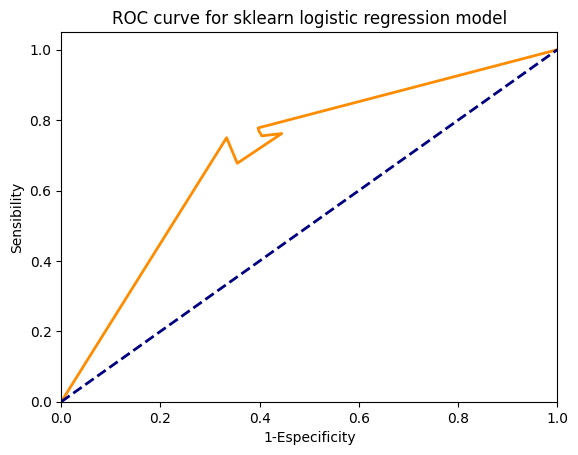

In [252]:
# initial variables
test_percentages = [0.1, 0.25, 0.50, 0.75, 0.9, 1]
y_tests = {'our_model': [], 'sklearn_model': []}
y_preds = {'our_model': [], 'sklearn_model': []}
accurancies = {'our_model': [], 'sklearn_model': []}
precisions = {'our_model': [], 'sklearn_model': []}
recalls = {'our_model': [], 'sklearn_model': []}
num_rows = min(X0_test.shape[0], X1_test.shape[0])

# get testing metrics by using different amount of tests
for test_percentage in test_percentages:

    # get the amount of data needed for each percentage
    n_tests = int(num_rows * test_percentage)
    X0_test_i = X0_test.iloc[:n_tests, :]
    X1_test_i = X1_test.iloc[:n_tests, :]
    y0_test_i = y0_test.iloc[:n_tests]
    y1_test_i = y1_test.iloc[:n_tests]

    X_test_i = pd.concat([X0_test_i, X1_test_i], axis= 0)
    y_test_i = pd.concat([y0_test_i, y1_test_i], axis= 0)
    y_tests['our_model'].append(y_test_i)
    y_tests['sklearn_model'].append(y_test_i)

    ## Predictions for out model
    # predict classes for test set
    if isinstance(X_test_i, pd.DataFrame):
        X_test_i = X_test_i.to_numpy()
        
    y_pred_i = model.predict(X_test_i)
    y_pred_i = pd.DataFrame(y_pred_i)

    y_preds['our_model'].append(y_pred_i)

    # get the metrics
    accurancies['our_model'].append(model.accurancy(y_pred_i, y_test_i))
    precisions['our_model'].append(model.precision(y_pred_i, y_test_i))
    recalls['our_model'].append(model.recall(y_pred_i, y_test_i))

    ## Predictions for sklearn model
    y_pred_i = model_sklearn.predict(X_test_i)
    y_preds['sklearn_model'].append(y_pred_i)

    # get the metrics
    accurancies['sklearn_model'].append(model.accurancy(y_pred_i, y_test_i))
    precisions['sklearn_model'].append(model.precision(y_pred_i, y_test_i))
    recalls['sklearn_model'].append(model.recall(y_pred_i, y_test_i))

# draw ROC curve
fpr_model = np.array([0., 1.])
tpr_model = np.array([0., 1.])
fpr_sk = np.array([0., 1.])
tpr_sk = np.array([0., 1.])
aucs = {'our_model': [], 'sklearn_model': []}
for i in range(len(test_percentages)):
    fpr_i, tpr_i, auc_i = model.auc(y_preds['sklearn_model'][i], y_tests['sklearn_model'][i])
    fpr_sk = np.insert(fpr_sk, -1, fpr_i[1])
    tpr_sk = np.insert(tpr_sk, -1, tpr_i[1])
    aucs['sklearn_model'].append(auc_i)

    fpr_i, tpr_i, auc_i = model.auc(y_preds['our_model'][i], y_tests['our_model'][i])
    fpr_model = np.insert(fpr_model, -1, fpr_i[1])
    tpr_model = np.insert(tpr_model, -1, tpr_i[1])
    aucs['our_model'].append(auc_i)

# display test metric results
title_row = ['Amount of tests','Model', 'Accurancy', 'Precision', 'Recall', 'Auc']
df_results = pd.DataFrame(columns=title_row)

for i, test_percentage in enumerate(test_percentages):
    row = [int(test_percentage*num_rows), 'Our model', accurancies['our_model'][i], precisions['our_model'][i], recalls['our_model'][i], aucs['our_model'][i]]
    df_results.loc[len(df_results)] = row
    row = [int(test_percentage*num_rows), 'Sklearn model', accurancies['sklearn_model'][i], precisions['sklearn_model'][i], recalls['sklearn_model'][i], aucs['sklearn_model'][i]]
    df_results.loc[len(df_results)] = row

print(df_results)
model.plot_roc(fpr_model, tpr_model, 'ROC curve for our logistic regression model')
model.plot_roc(fpr_sk, tpr_sk, 'ROC curve for sklearn logistic regression model')